In [213]:
import numpy as np
import pandas as pd
import statistics
import random
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


In [198]:
num_of_iterations = [50,100,150,200,250,300,400,500,800,1000]
# val_of_alpha = [0.001, 0.003, 0.005, 0.008, 0.01, 0.05]
final_mse_for_theta = []
final_mse_for_alpha = []

In [217]:


class Weather:
    mean_std = list()
    theta_val = None
    alpha = 0.005
    iterations = 1000
    
    def clean_and_prepare_data(self,train_data_frm):
        drop_indices = ['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']
        train_data_frm = train_data_frm.drop(drop_indices,axis=1)
        predict_col = train_data_frm.iloc[:,1]
        train_data_frm = train_data_frm.drop(["Apparent Temperature (C)"],axis=1)
        train_data_frm = pd.concat([train_data_frm,predict_col],axis=1)
        return train_data_frm
    
    def find_mean_std(self,train_data_frm):
        for cols in range(len(train_data_frm.columns)-1):
            col = train_data_frm.iloc[:,cols]
            mean_val = statistics.mean(col)
            std_val = statistics.stdev(col)
            self.mean_std.append([mean_val,std_val])



    def preproccess_data(self,train_data_frm):
        col_list = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
        j=0
        for i in col_list:
            train_data_frm[i] = (train_data_frm[i]-self.mean_std[j][0])/self.mean_std[j][1]
            j+=1
        return train_data_frm
    
    def run_gradient_descent(self,train_data_frm):
#         print("set_theta_alpha")
        X_data = train_data_frm.iloc[:,:-1].values
        Y_data = train_data_frm.iloc[:,-1].values
        rows, cols = X_data.shape
        X_data = np.c_[np.ones(rows),X_data]
#         print("in run gradient descent")
#         print(X_data.shape)
        self.theta_val = np.ones(X_data.shape[1])
        self.theta_val = np.empty(X_data.shape[1])
        self.theta_val.fill(1)
        for i in range(self.iterations):
            h = X_data.dot(self.theta_val)
            loss_val = h - Y_data
            gradient = ((X_data.T.dot(loss_val))/X_data.shape[0])
            self.theta_val = self.theta_val - self.alpha * gradient
#         print(self.theta_val)
    
    def train_validation_split(self,data_frm,validation_data_size):
       
        if isinstance(validation_data_size, float):
            validation_data_size=round(validation_data_size * len(data_frm))
        indices=data_frm.index.tolist()
        valid_indices=random.sample(indices, validation_data_size)
        valid_datafrm=data_frm.loc[valid_indices]
        train_datafrm=data_frm.drop(valid_indices)
        return train_datafrm, valid_datafrm
    
    def check_validation_data(self,validation_data_frm):
#         validation_data_frm = self.preproccess_data(validation_data_frm)
        actual_data = validation_data_frm.iloc[:,-1].values
        x_data = validation_data_frm.iloc[:,:-1].values
#         print(x_data)
        x_data = np.c_[np.ones(x_data.shape[0]),x_data]
        predicted_data = x_data.dot(self.theta_val)
        return actual_data, predicted_data
    
    def train(self,train_path):
        train_data_frm = pd.read_csv(train_path)
        train_data_frm = self.clean_and_prepare_data(train_data_frm)
        self.find_mean_std(train_data_frm)
        train_data_frm = self.preproccess_data(train_data_frm)
        random.seed(0)
        train_data_frm, validation_data_frm = self.train_validation_split(train_data_frm, validation_data_size = 0.4)
#         li = []
#         for it in num_of_iterations:
#             self.iterations = it
        self.run_gradient_descent(train_data_frm)
        actual_data, predicted_data = self.check_validation_data(validation_data_frm)
#             li.append(mean_squared_error(actual_data, predicted_data))
#         final_mse_for_theta.append(li)
#         actual_data, predicted_data = self.check_validation_data(validation_data_frm)
        return actual_data, predicted_data

    def predict(self,test_path):
        test_data_frm = pd.read_csv(test_path)
        drop_indices = ['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']
        test_data_frm = test_data_frm.drop(drop_indices,axis=1)
        test_data = self.preproccess_data(test_data_frm).values
        test_data = np.c_[np.ones(test_data.shape[0]),test_data]
        predict_values = test_data.dot(self.theta_val)
        return predict_values
    
        

In [218]:
model4 = Weather()
actual_data, predicted_data = model4.train('/home/jyoti/Documents/SMAI/assign2/Q4/Question-4/weather.csv') # Path to the train.csv will be provided
# prediction4 = model4.predict('/home/jyoti/Documents/SMAI/assign2/Q4/Question-4/weather_test.csv') 
# print(actual_data)
# print( predicted_data)
# print(final_mse_for_theta)

## Graph of Number of Iterations vs Mean Squared Error for different values of theta

Text(0.5, 1.0, 'Number of Iterations vs Mean Squared Error')

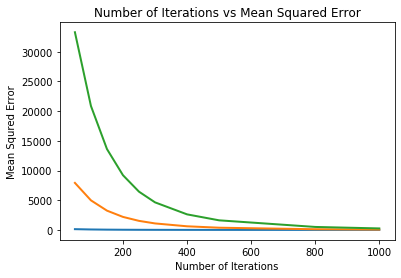

In [205]:
plt.plot(num_of_iterations,final_mse_for_theta[0], linewidth=2, markersize=12)
plt.plot(num_of_iterations,final_mse_for_theta[1],  linewidth=2, markersize=12)
plt.plot(num_of_iterations,final_mse_for_theta[2], linewidth=2, markersize=12)
plt.xlabel('Number of Iterations') 
plt.ylabel('Mean Squred Error') 
plt.title('Number of Iterations vs Mean Squared Error') 

## Performance Metrics

### 1. Mean Squared Error

In [177]:
print("Mean Squared Error = ",mean_squared_error(actual_data, predicted_data))

Mean Squared Error =  1.5899289082413153


### 2. R2 Score

In [180]:
print("R2 Score = ",r2_score(actual_data, predicted_data))

R2 Score =  0.9862064986706661


### 3. Mean Absolute Error

In [179]:
print("Mean Absolute Error = ",mean_absolute_error(actual_data, predicted_data))

Mean Absolute Error =  1.0017015299020529


### 4.Mean Absolute Percentage Error

In [219]:
result= np.empty(actual_data.shape)
for j in range(actual_data.shape[0]):
    d = 1
    if actual_data[j]!=0:
        n = (actual_data[j]-predicted_data[j])
        d = actual_data[j]
        result[j]= n/d
    else :
        n = predicted_data[j]
        d = np.mean(actual_data)
        result[j] = n/d
        
m=np.mean(np.abs(result))*100
print("Mean Absolute Percentage Error = ",m)

Mean Absolute Percentage Error =  52.20915207633492
